<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Деревья-решений" data-toc-modified-id="Деревья-решений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Деревья решений</a></span><ul class="toc-item"><li><span><a href="#Вспоминаем,-как-выглядит-decision-boundary-для-логистической-регресии" data-toc-modified-id="Вспоминаем,-как-выглядит-decision-boundary-для-логистической-регресии-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вспоминаем, как выглядит decision boundary для логистической регресии</a></span></li><li><span><a href="#Decision-boundary-для-дерева-решений" data-toc-modified-id="Decision-boundary-для-дерева-решений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Decision boundary для дерева решений</a></span></li></ul></li><li><span><a href="#Оценка-качества" data-toc-modified-id="Оценка-качества-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оценка качества</a></span><ul class="toc-item"><li><span><a href="#С-помощью-train_test_split" data-toc-modified-id="С-помощью-train_test_split-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>С помощью train_test_split</a></span></li><li><span><a href="#С-помощью-кросс-валидации" data-toc-modified-id="С-помощью-кросс-валидации-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>С помощью кросс-валидации</a></span></li><li><span><a href="#С-помощью-stratified-кросс-валидации" data-toc-modified-id="С-помощью-stratified-кросс-валидации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>С помощью stratified кросс-валидации</a></span></li></ul></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random forest</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-Decision-Tree" data-toc-modified-id="Сравнение-с-Decision-Tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение с Decision Tree</a></span></li><li><span><a href="#Bagging-как-частный-случай-Random-forest" data-toc-modified-id="Bagging-как-частный-случай-Random-forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bagging как частный случай Random forest</a></span></li></ul></li><li><span><a href="#Подбор-(тюнинг)-гиперпараметров" data-toc-modified-id="Подбор-(тюнинг)-гиперпараметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подбор (тюнинг) гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Randomized-Search" data-toc-modified-id="Randomized-Search-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Randomized Search</a></span></li></ul></li><li><span><a href="#Склонность-моделей-к-переобучению" data-toc-modified-id="Склонность-моделей-к-переобучению-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Склонность моделей к переобучению</a></span><ul class="toc-item"><li><span><a href="#Еще-один-вариант-для-оценки-качества-модели-на-кросс-валидации" data-toc-modified-id="Еще-один-вариант-для-оценки-качества-модели-на-кросс-валидации-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Еще один вариант для оценки качества модели на кросс-валидации</a></span></li><li><span><a href="#Задание.-Проверка-склонности-моделей-к-переобучению." data-toc-modified-id="Задание.-Проверка-склонности-моделей-к-переобучению.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Задание. Проверка склонности моделей к переобучению.</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Деревья решений

Реализации методов в sklearn.

Decision Tree:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Random Forest:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

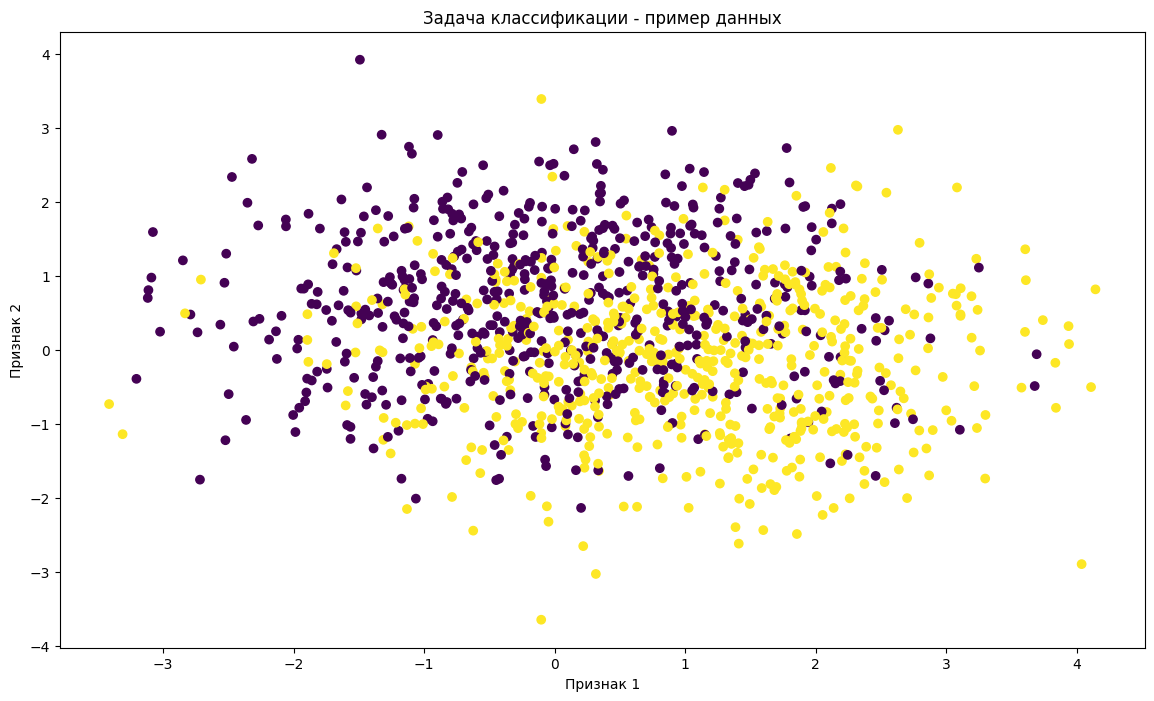

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1200, noise=1, random_state=42)

# Визуализация данных
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Задача классификации - пример данных')
plt.show()

In [3]:
# Функция для визуализации границы принятия решений
def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

## Вспоминаем, как выглядит decision boundary для логистической регресии

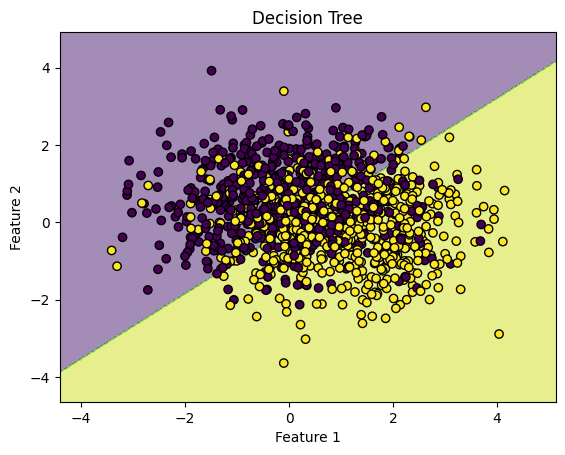

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plot_decision_boundary(clf, 'Decision Tree')

## Decision boundary для дерева решений

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

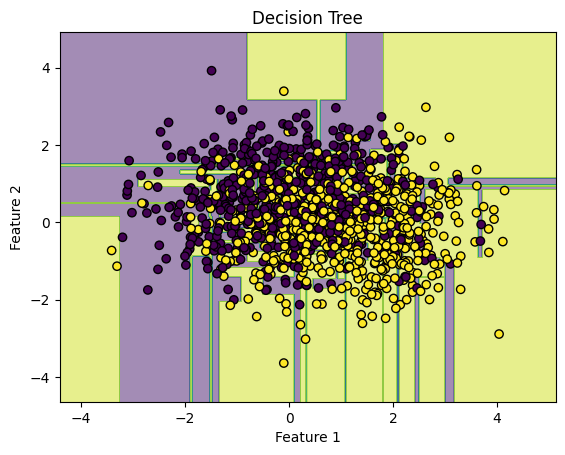

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plot_decision_boundary(clf, 'Decision Tree')

<img src='https://editor.analyticsvidhya.com/uploads/74581decision-tree-boundary.png'>

<img src='https://images.slideplayer.com/34/8334889/slides/slide_2.jpg'>

Материалы по tree based methods:
- Tree based methods (Stanford) https://hastie.su.domains/MOOC-Slides/trees.pdf
- Tree based methods, part 1 (CMU) https://www.andrew.cmu.edu/user/achoulde/95791/lectures/lecture05/lecture05_95791.pdf    
- Tree based methods, part 2 (CMU) https://www.andrew.cmu.edu/user/achoulde/95791/lectures/lecture06/lecture06_95791.pdf
- An Introduction to Statistical Learning. Chapter 8 'Tree Based Methods' https://hastie.su.domains/ISLR2/ISLRv2_website.pdf
- The Elements of Statistical Learning. Chapter 9.2, 10, 15 https://hastie.su.domains/Papers/ESLII.pdf

# Оценка качества

## С помощью train_test_split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание объекта классификатора дерева решений
clf = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Прогнозирование классов на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка качества модели на основе AUC
auc = roc_auc_score(y_test, y_pred)
print('Test AUC: %0.3f' % auc)

Test AUC: 0.617


## С помощью кросс-валидации

In [8]:
from sklearn.model_selection import cross_val_score

# Выполнение кросс-валидации с использованием 3 фолдов
scores = cross_val_score(clf, X, y, cv=3, scoring='roc_auc', n_jobs=-1)

# Вывод среднего AUC и стандартного отклонения
print('Cross-Validation AUC: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std()))

Cross-Validation AUC: 0.615 (+/- 0.020)


<img src='https://es.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1676051591395.jpg'>

## С помощью stratified кросс-валидации

In [9]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Выполнение кросс-валидации
scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)

# Вывод информации о качестве модели
print('Cross-Validation AUC: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std()))

Cross-Validation AUC: 0.591 (+/- 0.025)


<img src='https://d2mk45aasx86xg.cloudfront.net/image1_11zon_10bb3bd085.webp'>

# Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Создание объекта классификатора случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
print('Cross-Validation AUC: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std()))

Cross-Validation AUC: 0.718 (+/- 0.007)


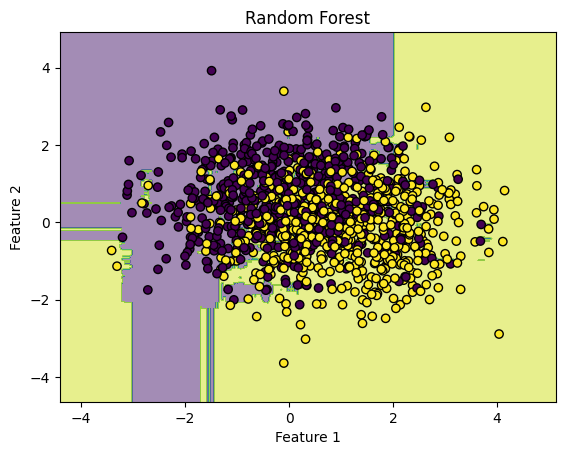

In [11]:
# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)
plot_decision_boundary(clf, 'Random Forest')

## Сравнение с Decision Tree

<img src='https://www.researchgate.net/profile/Erika-Amstalden-Van-Hove/publication/228540194/figure/fig1/AS:301839783350274@1448975620988/The-Random-Forest-classifier-is-an-ensemble-of-decision-trees-where-the-single-trees-are.png'>

- The Elements of Statistical Learning. Page 588 https://hastie.su.domains/Papers/ESLII.pdf<br>
"The bias of bagged trees is the same as that of the individual trees, and the only hope of improvement is through variance reduction. This is in contrast to boosting, where the trees are grown in an adaptive way to remove bias, and hence are not i.d."

## Bagging как частный случай Random forest

<img src='https://i.stack.imgur.com/sYR7y.png'>

# Подбор (тюнинг) гиперпараметров

<img src='https://miro.medium.com/v2/resize:fit:1200/1*FIIGhzbuTo2vI62mFcbMTg.png'>

<img src='https://editor.analyticsvidhya.com/uploads/82017Para-HP.png'>

-------

<img src='https://community.alteryx.com/t5/image/serverpage/image-id/74545i97245FDAA10376E9?v=v2'>

## Grid search

In [12]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42)

# Задание сетки параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='roc_auc')

# Подбор оптимальных параметров с использованием кросс-валидации
grid_search.fit(X, y)

# Вывод наилучших параметров и оценки модели
print('Best Parameters:', grid_search.best_params_)
print('Best Score: %0.3f' % grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'n_estimators': 300}
Best Score: 0.764


In [13]:
scores = grid_search.cv_results_
mean = scores['mean_test_score'][np.argmax(scores['mean_test_score'])]
std = scores['std_test_score'][np.argmax(scores['mean_test_score'])]

print('Cross-Validation AUC: %0.3f (+/- %0.3f)' % (mean, std))

Cross-Validation AUC: 0.764 (+/- 0.004)


## Randomized Search

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Задание распределений параметров для случайного поиска
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': [None, 5, 10]
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=kf, scoring='roc_auc')

# Подбор оптимальных параметров с использованием кросс-валидации
random_search.fit(X, y)

# Вывод наилучших параметров и оценки модели
print('Best Parameters:', random_search.best_params_)
print('Best Score: %0.3f' % random_search.best_score_)

Best Parameters: {'max_depth': 5, 'n_estimators': 253}
Best Score: 0.764


In [15]:
scores = random_search.cv_results_
mean = scores['mean_test_score'][np.argmax(scores['mean_test_score'])]
std = scores['std_test_score'][np.argmax(scores['mean_test_score'])]

print('Cross-Validation AUC: %0.3f (+/- %0.3f)' % (mean, std))

Cross-Validation AUC: 0.764 (+/- 0.004)


# Склонность моделей к переобучению

<img src='https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png'>

## Еще один вариант для оценки качества модели на кросс-валидации

In [16]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(random_state=42, max_depth=5)    
cv_results = cross_validate(clf, X, y, cv=kf, return_train_score=True, scoring='roc_auc')

In [17]:
cv_results

{'fit_time': array([0.00244474, 0.00207829, 0.00215125]),
 'score_time': array([0.00237107, 0.00153995, 0.00152993]),
 'test_score': array([0.73345 , 0.702575, 0.734625]),
 'train_score': array([0.8271125 , 0.82518438, 0.83510937])}

## Задание. Проверка склонности моделей к переобучению.

- Обучить модели дерево решений и случайный лес для различных значений max_depth в интервале от 1 до 35 включительно.
- Для каждого значения max_depth выполнить оценку качества модели на кросс-валидации (использовать метрику AUC)
- Построить график для оценки качества каждой из моделей тренировочном и тестовом наборе данных (см. вывод cross_validate) в зависимости от параметра max_depth
- Кросс-валидацию необходимо выполнять StratifiedKFold, как в примерах выше
- Обязательно закрепить значение параметра random_state для всех используемых методов
- Кол-во деревьев для случайного леса оставить по умолчанию (n_estimators=100)
- Если останется время, проделать еще один эксперимент для случайного леса, но кол-во деревье увеличивать с ростом max_depth. Например, по линейной формуле n_estimators=max_depth*25

# Summary

Плюсы методов, основанных на решающих деревьях:
- интерпретируемость
- устойчивость к масштабированию
- умение моделировать нелинейные зависимости

Минусы методов, основанных на решающих деревьях:
- склонность к переобучению
- ограниченная линейная аппроксимация